Exploring Dandiset 001363: Neural Spiking Data in the Rat Somatosensory Cortex

**Important Note:** This notebook was AI-generated using dandi-notebook-gen and has not been fully verified. Exercise caution when interpreting the code or results.

## Overview of the Dandiset

This notebook explores Dandiset 001363, which contains neural spiking data in the rat somatosensory cortex using a flexible electrode responding to transcranial focused ultrasound. The study investigates the neuronal response to transcranial focused ultrasound stimulation (tFUS) on the somatosensory cortex using a 128-element array transducer and a chronically implanted ultraflexible nanoelectric thread electrode.

You can find more information about this Dandiset at: https://neurosift.app/dandiset/001363

## Notebook Overview

This notebook will cover the following:

1.  Loading the Dandiset using the DANDI API.
2.  Examining the assets (files) available in the Dandiset.
3.  Loading an NWB file and exploring its contents.
4.  Visualizing electrode locations.
5.  Analyzing trial durations.

## Required Packages

The following packages are required to run this notebook. Please ensure that they are installed in your environment.

*   pynwb
*   h5py
*   remfile
*   pandas
*   matplotlib
*   seaborn

In [1]:
from dandi.dandiapi import DandiAPIClient

# Connect to DANDI archive
client = DandiAPIClient()
dandiset = client.get_dandiset("001363")
assets = list(dandiset.get_assets())

print(f"Found {len(assets)} assets in the dataset")
print("\nFirst 5 assets:")
for asset in assets[:5]:
    print(f"- {asset.path}")

Found 55 assets in the dataset

First 5 assets:
- sub-BH643/sub-BH643_ecephys.nwb
- sub-BH643/sub-BH643_ses-20241220T182204_ecephys.nwb
- sub-BH643/sub-BH643_ses-20241220T174647_ecephys.nwb
- sub-BH643/sub-BH643_ses-20241220T195303_ecephys.nwb
- sub-BH643/sub-BH643_ses-20241220T180423_ecephys.nwb


## Loading an NWB File and Examining Metadata

We will load one of the NWB files in the Dandiset and display some of its metadata.

In this example, we will load the file `sub-BH589/sub-BH589_ses-20240827T160457_ecephys.nwb`.

The URL for this asset is: `https://api.dandiarchive.org/api/assets/59d1acbb-5ad5-45f1-b211-c2e311801824/download/`

In [2]:
import pynwb
import h5py
import remfile

# Load the NWB file
url = "https://api.dandiarchive.org/api/assets/59d1acbb-5ad5-45f1-b211-c2e311801824/download/"
remote_file = remfile.File(url)
h5_file = h5py.File(remote_file)
io = pynwb.NWBHDF5IO(file=h5_file)
nwb = io.read()

# Display some metadata
print(f"Session description: {nwb.session_description}")
print(f"Identifier: {nwb.identifier}")
print(f"Session start time: {nwb.session_start_time}")
print(f"Institution: {nwb.institution}")

Session description: Rat Ultrasound Array Stimulation
Identifier: BH589_1500_200_67_25V
Session start time: 2024-08-27 16:04:57-04:00
Institution: Carnegie Mellon University


/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.5.0 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.6.0-alpha because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-experimental' version 0.1.0 because version 0.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


## Visualizing Electrode Locations

The following code visualizes the locations of the electrodes in the NWB file.

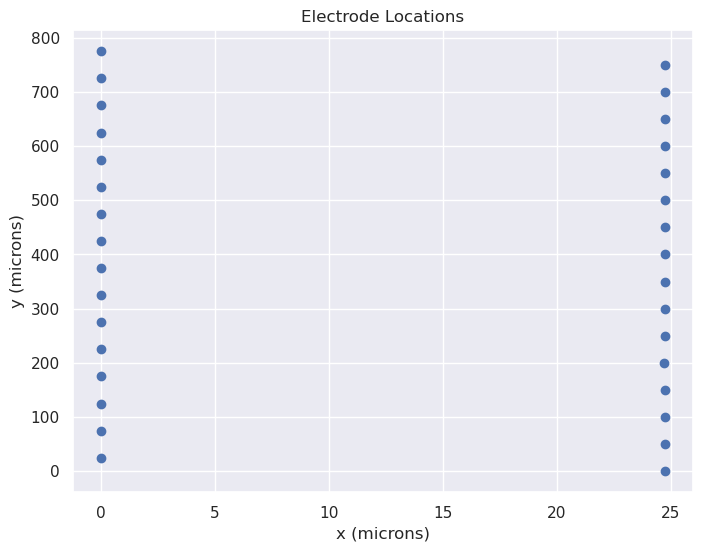

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

# Get the electrode data
electrodes = nwb.electrodes.to_dataframe()

# Plot the electrode locations
plt.figure(figsize=(8, 6))
plt.scatter(electrodes['x'], electrodes['y'])
plt.xlabel('x (microns)')
plt.ylabel('y (microns)')
plt.title('Electrode Locations')
plt.show() # Displaying the electrode locations plot

The electrode locations plot shows the spatial arrangement of the electrodes. In this case, the electrodes are arranged in two vertical lines along the y-axis. The x and y coordinates are in microns. This suggests that the probe used in this experiment has two shanks of electrodes, each with 16 electrodes along the y axis. The probe is a NET probe flexible electrode manufactured by Xie Lab Rice University.

## Analyzing Trial Durations

The following code analyzes the durations of the trials in the NWB file.

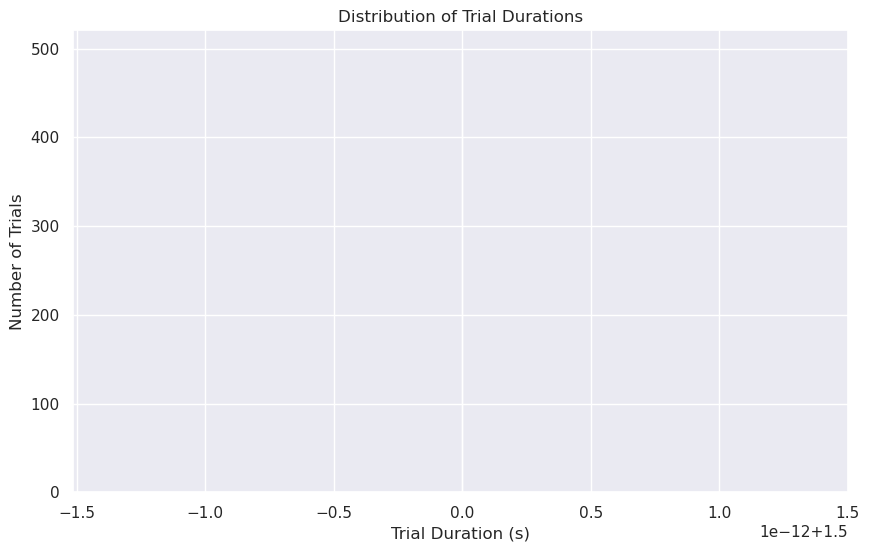

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

# Get the trials data
trials = nwb.intervals["trials"]
trials_df = trials.to_dataframe()

# Calculate trial durations
trials_df['duration'] = trials_df['stop_time'][:] - trials_df['start_time'][:]

# Plot the trial durations
plt.figure(figsize=(10, 6))
plt.hist(trials_df['duration'], bins=20)
plt.xlabel('Trial Duration (s)')
plt.ylabel('Number of Trials')
plt.title('Distribution of Trial Durations')
plt.show() # Displaying the trial durations plot

The distribution of trial durations shows that all trials have a duration of 1.5 seconds.

## Summary

This notebook demonstrated how to load and explore data from Dandiset 001363. We showed how to load the Dandiset using the DANDI API, load an NWB file, visualize electrode locations, and analyze trial durations.

Further analysis could involve exploring the raw electrophysiology data, examining the effects of transcranial focused ultrasound stimulation on neural activity, and investigating the relationship between neural activity and behavior.